# Unbalanced Dataset Graph

This is just plotting for a slide for my final presentation. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
%load_ext sql
%sql postgres://localhost/nb15
%config SqlMagic.autopandas = True

## Pull the data 

Grab the data from SQL and calculate the percents

In [3]:
label_count = %sql select label, count(label) num from full_data group by label; 

 * postgres://localhost/nb15
2 rows affected.


In [4]:
label_count

,label,num
0,0,2218761
1,1,321283


In [5]:
label_count['percent'] = label_count.num * 100. / label_count.num.sum()
label_count

,label,num,percent
0,0,2218761,87.351282
1,1,321283,12.648718


In [6]:
attack_count= %sql select attack_cat, count(attack_cat) num from full_data where label = 1 group by attack_cat;

 * postgres://localhost/nb15
9 rows affected.


In [7]:
attack_count['percent'] = attack_count.num * 100. / attack_count.num.sum()

In [8]:
attack_count

,attack_cat,num,percent
0,analysis,2677,0.833222
1,backdoors,2329,0.724906
2,dos,16353,5.089905
3,exploits,44525,13.858499
4,fuzzers,24246,7.546618
5,generic,215481,67.068908
6,reconnaissance,13987,4.353483
7,shellcode,1511,0.470302
8,worms,174,0.054158


In [9]:
attacks = attack_count.sort_values('percent', ascending=False)
attacks

,attack_cat,num,percent
5,generic,215481,67.068908
3,exploits,44525,13.858499
4,fuzzers,24246,7.546618
2,dos,16353,5.089905
6,reconnaissance,13987,4.353483
0,analysis,2677,0.833222
1,backdoors,2329,0.724906
7,shellcode,1511,0.470302
8,worms,174,0.054158


In [10]:
legend_labels = [ 'Generic', 'Exploit', 'Fuzzer', 
                 'Denial of Service', 'Reconnaissance',
                 'Analysis', 'Backdoor', 'Shellcode', 'Worm']

In [11]:
## The bar chart

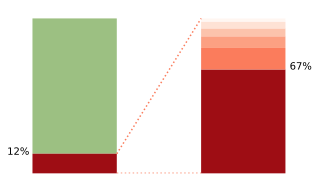

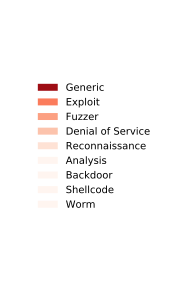

In [12]:
fig, ax = plt.subplots(figsize=(5,3))

width = 0.10
space = 2 *width
reds = plt.get_cmap('Reds', 10)
# greens = plt.get_cmap('Blues', 10)
green = (157/256, 193/256, 131/256)

darkred=reds(1/9)

attack_pct = label_count.loc[1, 'percent']
normal_pct = label_count.loc[0, 'percent']
p1 = ax.bar(0, normal_pct, width, bottom=attack_pct, color=green)
p2 = ax.bar(0, attack_pct, width, color=reds(.82))

level = 0 
attack_bars = [0] * 9

for i, a in enumerate(attacks.index):
    pct = attacks.loc[a, 'percent']
    fudge = .35 if i else 0
    color= reds(.82*((9.-i)/9 - fudge) )
    attack_bars[i] = ax.bar(space, pct, width,  bottom=level, color=color)
    level += pct
    
bar_red = reds(.4)
x = (width * .5 , width * 1.5 )
y = ( attack_pct, 100 )
plt.plot(x, y, color=bar_red, linestyle=':')
y = ( 0, 0 )
plt.plot(x, y, color=bar_red, linestyle=':')

plt.text(-width/2 -.03 , 12, '12%')
plt.text(width * 2.55 , 67, '67%')

legend_colors =  [ b[0] for b in attack_bars ]

plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)         
    
ax.set_frame_on(False)

plt.savefig('unbalanced.svg')
plt.show()

# it was easier to make the legend a separate file
# and put them together on the slide
fig, ax = plt.subplots(figsize=(3,5))
ax.legend(legend_colors, legend_labels, loc='center', frameon=False)
ax.set_frame_on(False)
plt.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelleft=False)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.savefig('legend.svg')
plt.show()